### Newton's method

Find roots with **Newton's method** for:


1) $\:f(x) = x\,cos(x) - x^2 \:\:\:  x_0 = 1$

2) $\:f(x) = x^3 - 7x^2 + 8x - 3 \:\:\: x_0 = 5 $

In [39]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.1

In [41]:
sess = tf.Session(config=config)

In [42]:
X = np.linspace(-1, 1, 100)

In [43]:
x = tf.placeholder(tf.float32, name="x")
y =  x*tf.cos(x)-x**2

In [44]:
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

In [45]:
grad_by_hand = tf.cos(x)-x*tf.sin(x)-2*x

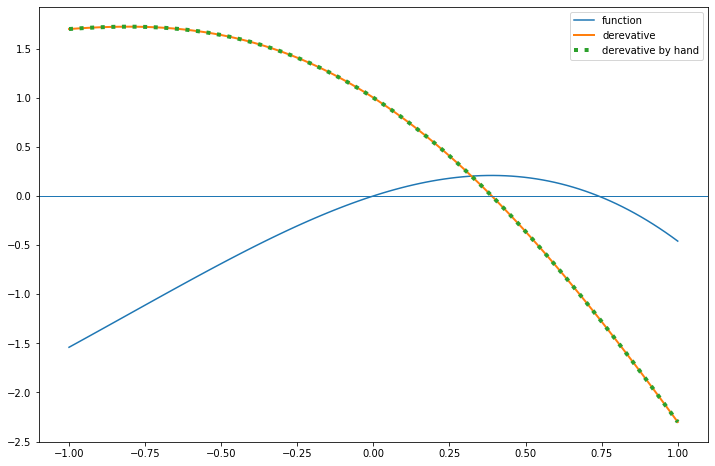

In [46]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.plot(X, sess.run(grad_by_hand, {x: X}), ":", lw=4, label="derevative by hand")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [47]:
iterations = 6
xstart1 = [-1]

for _ in range(iterations):
    current_x = xstart1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xstart1.append(next_x)
    
xstart2 = [1]

for _ in range(iterations):
    current_x = xstart2[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xstart2.append(next_x)

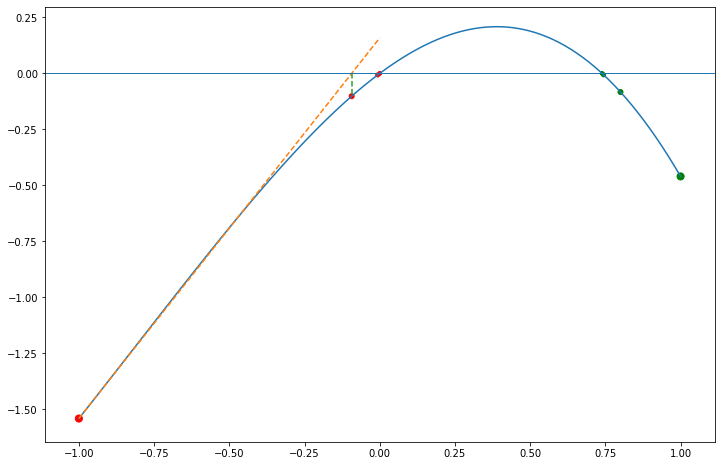

In [48]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.scatter(xstart1, sess.run(y, {x: xstart1}), s = 50/np.arange(1, 1+len(xstart1)), c="red")

x0, y0, k = xstart1[0], sess.run(y, {x: xstart1[0]}), sess.run(grad_y[0], {x: xstart1[0]})
plt.plot([x0, 0], [y0, y0 + k * (0 - x0)], "--")
plt.plot([xstart1[1], xstart1[1]], [0, sess.run(y, {x: xstart1[1]})], "--")

plt.scatter(xstart2, sess.run(y, {x: xstart2}), s = 50/np.arange(1, 1+len(xstart2)), c="green")

plt.axhline(y=0, linewidth=1);

In [49]:
print("root 1:", xstart1[-1],"\nroot 2:", xstart2[-1])

root 1: 0.0 
root 2: 0.7390851553427638


In [50]:
#second function

In [51]:
sess.close()
tf.reset_default_graph()
sess = tf.Session(config=config)

In [52]:
X1 = np.linspace(4, 8, 150)

In [53]:
x1 = tf.placeholder(tf.float32, name = "x1")
y1  = x1**3 -7*x1**2 + 8*x1 - 3

In [54]:
grad_y1 = tf.gradients(y1, x1, name="grad_y1_wrt_x1")

In [55]:
grad_hand = 3*x1**2-14*x1 + 8

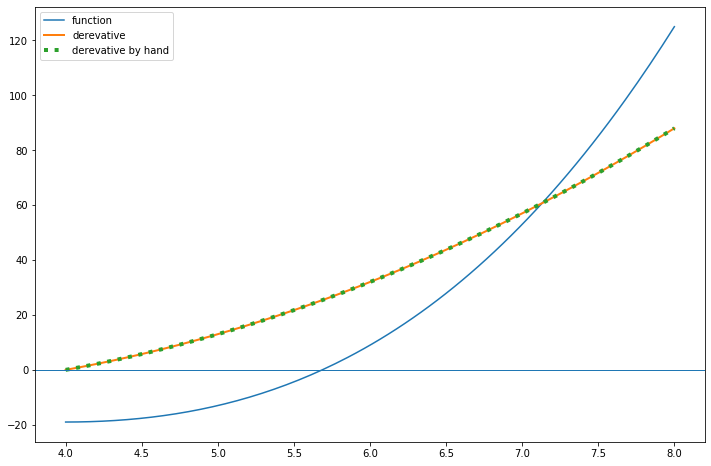

In [56]:
plt.figure(figsize=(12, 8))

plt.plot(X1, sess.run(y1, {x1: X1}), label="function")
plt.plot(X1, sess.run(grad_y1, {x1: X1})[0],lw=2, label="derevative")
plt.plot(X1, sess.run(grad_hand, {x1: X1}), ":", lw=4, label="derevative by hand")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [57]:
iterations1 = 15

In [ ]:
xstart = [5]

for _ in range(iterations1):
    current_x1 = xstart[-1]
    next_x1 = current_x1 - sess.run(y1/grad_y1[0], {x1: current_x1})
    xstart.append(next_x1)

In [ ]:
print("root 1:", xstart[-1])

### Softmax

In [34]:
def softmax(sess, x):
    """
    param sess: tf.Session
    param x:  np.array, n-dimentional vector
    returns: np.array n-dimentional vector
    """
    array = tf.placeholder(tf.float32)
    output = tf.exp(array)/tf.reduce_sum(tf.exp(array))  
    return output.eval({array: x}, session = sess)

In [35]:
# test
import tensorflow as tf
import numpy as np

In [36]:
with tf.Session() as sess:
    if np.allclose([0.0320586, 0.08714432, 0.23688282, 0.64391426],
                   softmax(sess, np.array([1, 2, 3, 4]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!


$$\text{softmax}(X)_{ij} = \frac{\exp(X_{ij})}{\sum_j \exp(X_{ij})}$$

In [37]:
def softmax_matrix(sess, x):
    """
    Computes softmax for each row vector in matrix.
    
    param sess: tf.Session
    param x:  np.array, (n x m) matrix
    returns: np.array, (n x m) matrix
    """
    array = tf.placeholder(tf.float32)
    output = tf.exp(array)/tf.reshape(tf.reduce_sum(tf.exp(array), axis=1), (-1,1))
    return output.eval({array: x}, session = sess)

In [38]:
with tf.Session() as sess:
    if np.allclose([[0.10650698, 0.78698604, 0.10650698],
                    [0.09003057, 0.24472847, 0.66524096]],
                   softmax_matrix(sess, np.array([[1,3,1], [-1, 0, 1]]))):
        print("Test passed!")
    else:
        print("Test failed!")

Test passed!
